### Assignment 5
### Prepared By: Woon Kim
### UNI: wk2371
### Course: ACTU 5841
### Date: February 27 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
def calc_gradient(B, y, x):
    B0 = B[0,0]
    B1 = B[0,1]
    
    f0 = -2*np.exp(B0+B1*x)*(y-np.exp(B0+B1*x)) # SUM( -2*e^[B0+B1*x] * (y-e^[B0+B1*x]) )
    f1 = -2*np.exp(B1*x+B0)*x*(y-np.exp(B0+B1*x)) #SUM( -2*e^[B1*x+B0]*x*(y-e^[B0+B1*x]) )
    
    return np.array([np.sum(f0), np.sum(f1)])

def calc_Jacobian(B, y, x):
    B0 = B[0,0]
    B1 = B[0,1]
    
    df0b0 = -2* (np.exp(B0+B1*x)*y - 2*np.exp(2*B1*x+2*B0))
    df0b1 = -2* (np.exp(B0+B1*x)*x*y - 2*np.exp(2*B1*x+2*B0)*x)
    df1b0 = -2*x* (np.exp(B1*x+B0)*y - 2*np.exp(2*B1*x+2*B0))
    df1b1 = -2*x* (np.exp(B1*x+B0)*x*y - 2*np.exp(2*B1*x+2*B0)*x)
    
    return np.array([
            [np.sum(df0b0), np.sum(df0b1)], 
            [np.sum(df1b0), np.sum(df1b1)]
            ])

In [1]:
def newton_raphson(x, y, B, max_iter):
    
    loss_history = []
    iteration = 0
    B_history = [B]

        
    for i in range(max_iter):        
        y_hat = np.exp(B[0,0] + B[0,1]*x)
        loss = np.sum((y - y_hat)**2)
                            
        #stop if there are no improvements in the loss
        if iteration > 0:
            if np.abs(loss - loss_history[0]) == 0:
                iteration = iteration - 1
                break   
        
        #keep track of the loss for each iteration
        loss_history.insert(0,loss)
                
        gradient = calc_gradient(B,y,x)
        Jacobian = calc_Jacobian(B,y,x)
        diff = np.matmul(np.linalg.inv(Jacobian),gradient)
        
        B = B - diff
        B_history.append(B)

        iteration = iteration + 1       
        
        
                
    return loss, B, iteration, loss_history, B_history

In [5]:
x = df['x']
y = df['y']
B = np.array([0.5, 0.75])
B = B.reshape(1,-1)

In [6]:
results = newton_raphson(x,y,B,10000)

In [7]:
loss = results[0]
B = results[1]
iteration = results[2]
loss_history = results[3]
B_history = results[4]

In [8]:
#SSE at B_truth
B_truth = np.array([1.0,0.5])
B_truth = B_truth.reshape(1,-1)
y_hat = np.exp(B_truth[0,0] + B_truth[0,1]*x)

SSE_truth = np.sum((y-y_hat)**2)

print('The SSE at B_truth is\nSSE_truth = %s' % (SSE_truth))

The SSE at B_truth is
SSE_truth = 12.014552846587636


In [9]:
#Smallest Loss Achieved
print('The smallest loss achieved is\nLoss = %s' % (round(loss,16)))

The smallest loss achieved is
Loss = 12.000179409325268


In [10]:
#fitted parameters
B0 = round(B[0,0],5)
B1 = round(B[0,1],5)
print('The fitted parameters are\nB0 = %s\nB1 = %s' % (B0, B1))

The fitted parameters are
B0 = 0.99835
B1 = 0.50347


In [11]:
#number of iteration
print('The number of iteration needed to reach this loss is\nIteration = %s' % (iteration))

The number of iteration needed to reach this loss is
Iteration = 7


In [12]:
#table
iteration2 = np.arange(0,iteration+2, 1)
df2 = pd.DataFrame(list(zip(iteration2, B_history, np.flip(loss_history))),
                   columns = ['iteration', 'B_hat', 'loss'])
df2

iteration                                        B_hat       loss
0          0                                [[0.5, 0.75]]  52.587876
1          1  [[1.5280388599029986, 0.20357574564890024]]  86.716261
2          2  [[1.1983577398897334, 0.38368613514774125]]  19.882687
3          3  [[1.0320987810358633, 0.48346502517498796]]  12.202874
4          4    [[0.999436529493238, 0.5028242642560683]]  12.000389
5          5   [[0.9983464120114138, 0.5034643991275811]]  12.000179
6          6   [[0.9983452317478493, 0.5034650911086407]]  12.000179
7          7   [[0.9983452317464654, 0.5034650911094519]]  12.000179

C:\Users\Woon\Documents\env_ds_3_10\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


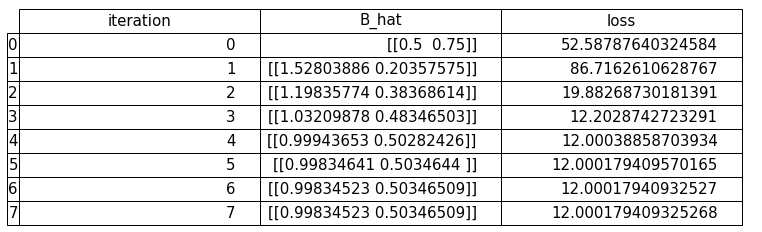

In [13]:
#saving table into an image for the writeup
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 2))
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
ax.set_frame_on(False)  
tabla = table(ax, df2, loc='upper right', colWidths=[0.3]*len(df2.columns)) 
tabla.auto_set_font_size(False) 
tabla.set_fontsize(15) 
tabla.scale(1.2, 2) 
plt.savefig('table.png', transparent=True)

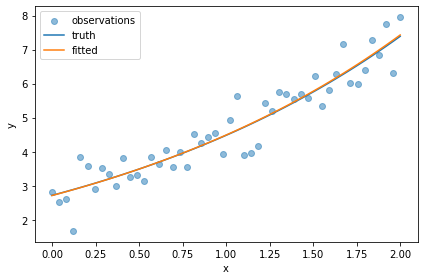

In [14]:
#plot
y_truth = np.exp(1.0+0.5*x)
y_fitted = np.exp(B[0,0] + B[0,1]*x)

plt.scatter(x,y, label = "observations", alpha=0.5)
plt.plot(x,y_truth, label = "truth")
plt.plot(x,y_fitted, label = "fitted")
plt.legend(loc="upper left")
plt.plot
plt.xlabel('x')
plt.ylabel('y')
#plt.show()

plt.tight_layout()
plt.savefig("Q5.png")

In [16]:
#RMSE
RMSE = np.sqrt(((y_hat - y) ** 2).mean())
print('The estimated RMSE via LOOCV is\nRMSE = %s' % (RMSE))

The estimated RMSE via LOOCV is
RMSE = 0.49019491728469883


In [17]:
#confirmed with the function in sklearn
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat, squared=False)

0.49019491728469883

In [18]:
#10 Fold CV
x = df['x']
y = df['y']
B = np.array([0.5, 0.75])
B = B.reshape(1,-1)
kf_df = pd.DataFrame(zip(x,y), columns = ['x', 'y'])

from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
kf_rmse = []

for train, test in kf.split(kf_df):
    X_train, X_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    nr = newton_raphson(X_train,y_train,B,10000)
    y_hat = np.exp(nr[1][0,1] + nr[1][0,1]*X_test)
    kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))

kf_RMSE = (1/10) * np.sum(kf_rmse)

In [19]:
print('The estimated RMSE via 10-fold CV is\nRMSE = %s' % (kf_RMSE))

The estimated RMSE via 10-fold CV is
RMSE = 1.9276722948217175
